# Data exploration

To start with, let us load the dataframe, summarize the columns, and plot a sactter matrix of the data to check for e.g. missing values, non-linear scaling, etc.. 

In [1]:
import pandas as pd

In [31]:
# Sample code number: id number
#     Clump Thickness: 1 - 10
# 3. Uniformity of Cell Size: 1 - 10
# 4. Uniformity of Cell Shape: 1 - 10
# 5. Marginal Adhesion: 1 - 10
# 6. Single Epithelial Cell Size: 1 - 10
# 7. Bare Nuclei: 1 - 10
# 8. Bland Chromatin: 1 - 10
# 9. Normal Nucleoli: 1 - 10
# 10. Mitoses: 1 - 10
# 11. Class: (2 for benign, 4 for malignant)

    
names = ['sampleid', 'clumpthickness', 'sizeuniformity', 'shapeunformity', 
         'adhesion', 'epithelialsize', 'barenuclei', 'blandchromatin', 'normalnucleoli', 
         'mitoses', 'cellclass'] 

df = pd.read_csv('./breast-cancer-wisconsin.data', names=names)
# df.drop('sampleid')
df.drop('sampleid', axis=1, inplace=True)
df.head(10)

df.cellclass = (df.cellclass == 4).astype(int)

# It turns out one column is a string, but should be an int... 
df.barenuclei = df.barenuclei.values.astype(int)



In [33]:
df.describe()

,clumpthickness,sizeuniformity,shapeunformity,adhesion,epithelialsize,barenuclei,blandchromatin,normalnucleoli,mitoses,cellclass
count,699.000000,699.000000,699.000000,699.000000,699.000000,6.990000e+02,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,2.005957e+11,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,5.303471e+12,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000e+00,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000e+00,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.500000e+00,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.402164e+14,10.000000,10.000000,10.000000,1.000000


In [34]:
# Check the class balance.  Turns out to be pretty good so we should have a relatively unbiased view
print 'Num Benign', (df.cellclass==2).sum(), 'Num Malignant', (df.cellclass==4).sum()

Num Benign 0 Num Malignant 0


# Scatter matrix.  

None of the features appear to require rescaling transformations e.g. on a log-scales...

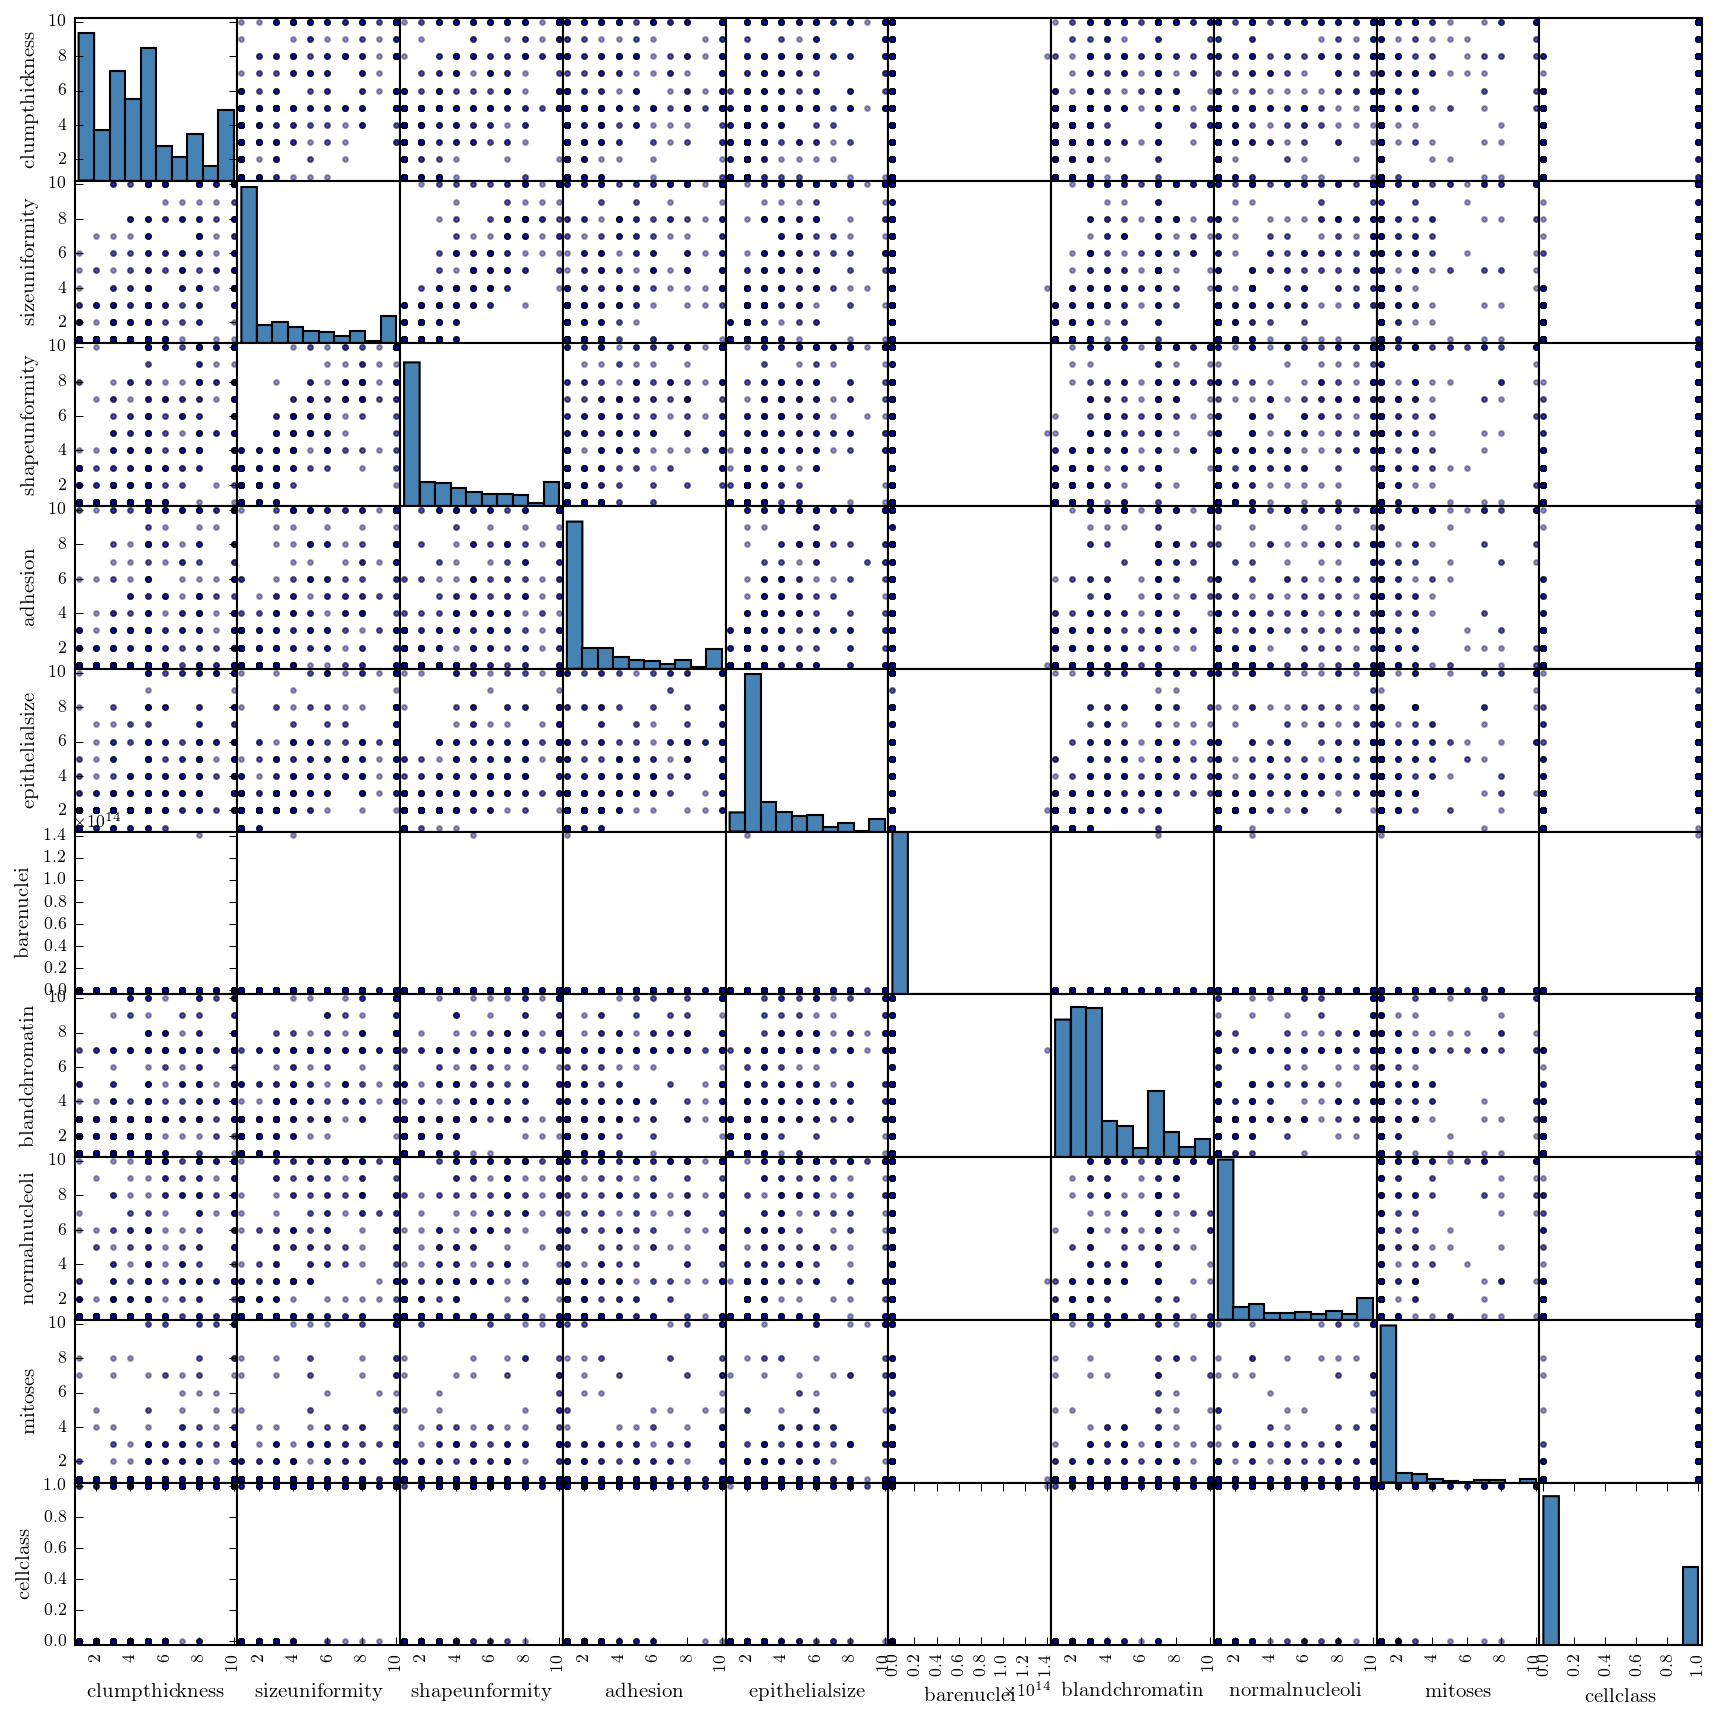

In [35]:
from pandas.tools.plotting import scatter_matrix
_ = scatter_matrix(df, figsize=(14,14), alpha=.4)

# Constructing a logistic regression classifier
Intriguingly, the logistic 

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import svm

LR = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1, 
                   fit_intercept=True, intercept_scaling=1, 
                   class_weight=None, random_state=None, 
                   solver='liblinear', max_iter=100, 
                   multi_class='ovr', verbose=1, 
                   warm_start=False, n_jobs=1)

X, Y = df.astype(np.float32).get_values()[:,:-1], df.get_values()[:,-1]

X2 = np.append(X,X**2, axis=1)
print X2.shape

LR.fit(X, Y)
print LR.score(X,Y)

C_list = np.logspace(-1, 2, 15)
CV_scores = []
CV_scores2 = [] 
for c in C_list: 
    LR = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=c, 
                   fit_intercept=True, intercept_scaling=1, 
                   class_weight=None, random_state=None, 
                   solver='liblinear', max_iter=100, 
                   multi_class='ovr', verbose=1, 
                   warm_start=False, n_jobs=1)
    CV_scores.append(np.average(cross_validation.cross_val_score(LR, X, Y, cv=6, n_jobs=12)))
    
    svm_class = svm.SVC(C=c, kernel='linear', gamma='auto', coef0=0.0, 
        shrinking=True, probability=False, tol=0.001, cache_size=200, 
        class_weight=None, verbose=False, 
        max_iter=-1, decision_function_shape=None, random_state=None)
    CV_scores2.append(np.average(cross_validation.cross_val_score(svm_class, X, Y, cv=6, n_jobs=12)))
    
    

(699, 18)
[LibLinear]0.961373390558
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

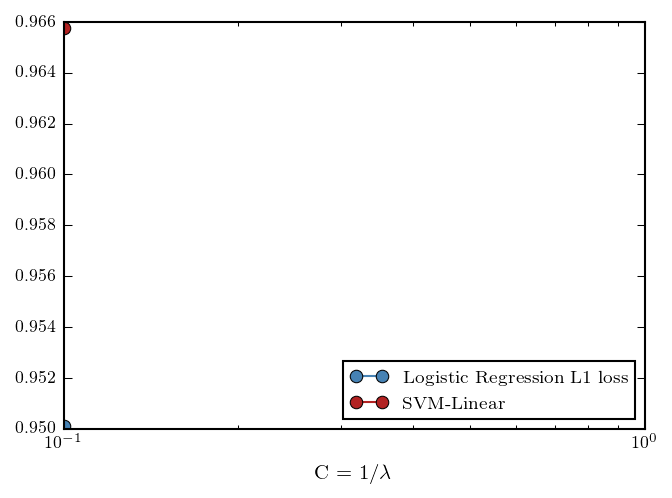

In [147]:
plt.plot(C_list, CV_scores, marker='o', label='Logistic Regression L1 loss')
plt.plot(C_list, CV_scores2, marker='o', label='SVM-Linear')
plt.xscale('log')
plt.xlabel(r'C = 1/$\lambda$')
plt.legend(loc=4)



In [128]:
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1e10, 
               fit_intercept=True, intercept_scaling=1, 
               class_weight=None, random_state=None, 
               solver='liblinear', max_iter=100, 
               multi_class='ovr', verbose=1, 
               warm_start=False, n_jobs=1)
LR.fit(X[:300],Y[:300])

svm_class = svm.SVC(C=10., kernel='linear', gamma='auto', coef0=0.0, 
        shrinking=True, probability=True, tol=0.001, cache_size=200, 
        class_weight=None, verbose=False, 
        max_iter=-1, decision_function_shape=None, random_state=None)
svm_class.fit(X[:300],Y[:300])

# Confusion matrix
print 
print 'Confusion Matrix - LASSO Regression'
print confusion_matrix(y_true=Y[300:], y_pred=LR.predict(X[300:]))
print 'Confusion Matrix - SVM-Linear'
print confusion_matrix(y_true=Y[300:], y_pred=svm_class.predict(X[300:]))

[LibLinear]
Confusion Matrix - LASSO Regression
[[288   7]
 [  4 100]]
Confusion Matrix - SVM-Linear
[[290   5]
 [  4 100]]


# Measuring precision/recall and ROC curves

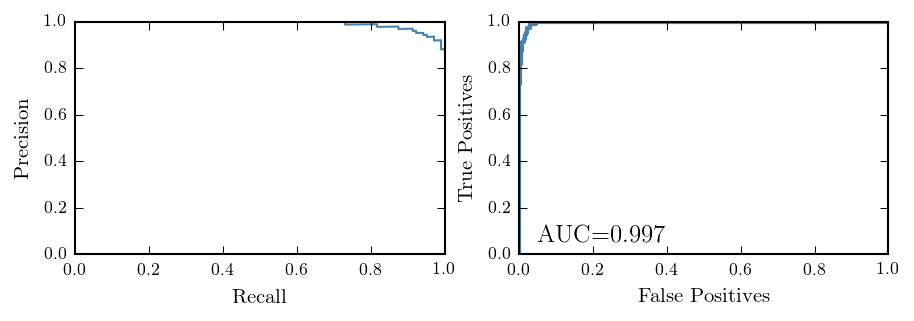

In [140]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve


plt.figure(figsize=(7,2))
plt.subplot(121)
prec, rec, thresh = precision_recall_curve(y_true=Y[300:], probas_pred=LR.predict_proba(X[300:])[:,1])
plt.plot(rec, prec,)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(122)
fp, tp, thresh = roc_curve(y_true=Y[300:], y_score=LR.predict_proba(X[300:])[:,1])
AUC = roc_auc_score(y_true=Y[300:], y_score=LR.predict_proba(X[300:])[:,1])
roc_curve(y_true=Y[300:], y_score=LR.predict_proba(X[300:])[:,1])
plt.text(.05, .05, 'AUC=%1.3f'%AUC)
plt.plot(fp, tp, linewidth=2)
plt.xlabel('False Positives')
plt.ylabel('True Positives')